In [ ]:
from google.colab import drive
drive.mount('', force_remount=True)

Mounted at 


In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Long_Covid_data = pd.read_csv('host_train.csv')

In [ ]:
Long_Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            25000 non-null  int64  
 1   Hospital                           25000 non-null  int64  
 2   Hospital_type                      25000 non-null  int64  
 3   Hospital_city                      25000 non-null  int64  
 4   Hospital_region                    25000 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  25000 non-null  int64  
 6   Department                         25000 non-null  object 
 7   Ward_Type                          25000 non-null  object 
 8   Ward_Facility                      25000 non-null  object 
 9   Bed_Grade                          24996 non-null  float64
 10  patientid                          25000 non-null  int64  
 11  City_Code_Patient                  24750 non-null  flo

In [ ]:
Long_Covid_data['Illness_Severity'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [ ]:
Long_Covid_data.describe()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit
count,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,24996.000000,25000.000000,24750.000000,25000.000000,25000.000000
mean,12500.500000,18.812280,1.332480,4.77092,0.785680,3.104200,2.663306,65331.823920,7.021535,3.247760,4980.715440
std,7217.022701,8.632382,1.567812,3.16322,0.743834,1.141663,0.857299,37885.136227,4.278515,1.761323,1052.846063
min,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,70.000000,1.000000,0.000000,1820.000000
25%,6250.750000,11.000000,0.000000,2.00000,0.000000,2.000000,2.000000,32629.000000,4.000000,2.000000,4307.000000
50%,12500.500000,21.000000,1.000000,5.00000,1.000000,3.000000,3.000000,64405.000000,8.000000,3.000000,4855.000000
75%,18750.250000,26.000000,2.000000,7.00000,1.000000,4.000000,3.000000,98023.500000,8.000000,4.000000,5495.000000
max,25000.000000,32.000000,6.000000,13.00000,2.000000,12.000000,4.000000,131595.000000,34.000000,24.000000,10999.000000


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Encode labels in column 'species'.
Long_Covid_data['Illness_Severity']= label_encoder.fit_transform(Long_Covid_data['Illness_Severity'])
Long_Covid_data['Illness_Severity'].unique()

array([0, 2, 1])

In [ ]:
Long_Covid_data['Type of Admission'] = label_encoder.fit_transform(Long_Covid_data['Type of Admission'])
Long_Covid_data['Type of Admission'].unique()

array([0, 1, 2])

In [ ]:
Long_Covid_data['Department'] = label_encoder.fit_transform(Long_Covid_data['Department'])
Long_Covid_data['Department'].unique()

array([3, 1, 2, 0, 4])

In [ ]:
Long_Covid_data['Stay_Days'].unique()

array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [ ]:
rep_num_cylinders = {"0-10":0, "11-20":0, "21-30":0,"Nov-20":0,
                     "31-40":0, "41-50":1, "51-60":1,
                     "61-70":1, "71-80":1, "81-90":1,
                     "91-100":1,"More than 100 Days":1}

Long_Covid_data["Stay_Days"].replace(rep_num_cylinders, inplace=True)

In [ ]:
Long_Covid_data['Stay_Days'].unique()

array([0, 1])

In [ ]:
Long_Covid_data['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       'Nov-20', '0-10', '91-100'], dtype=object)

In [ ]:
rep_num_cylinders = {"Nov-20":0,"0-10":1, "11-20":2, "21-30":3,
                     "31-40":4, "41-50":5, "51-60":6,
                     "61-70":7, "71-80":8, "81-90":9,
                     "91-100":10}

Long_Covid_data["Age"].replace(rep_num_cylinders, inplace=True)

In [ ]:
Long_Covid_data['Age'].unique()

array([ 6,  8,  4,  5,  9,  7,  3,  0,  1, 10])

In [ ]:
Long_Covid_data['Ward_Type'] = label_encoder.fit_transform(Long_Covid_data['Ward_Type'])
Long_Covid_data['Ward_Type'].unique()

array([2, 3, 1, 0, 4])

In [ ]:
Long_Covid_data['Ward_Facility'] = label_encoder.fit_transform(Long_Covid_data['Ward_Facility'])
Long_Covid_data['Ward_Facility'].unique()

array([5, 4, 3, 1, 0, 2])

In [ ]:
Long_Covid_data.isna().sum()

case_id                                0
Hospital                               0
Hospital_type                          0
Hospital_city                          0
Hospital_region                        0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility                          0
Bed_Grade                              4
patientid                              0
City_Code_Patient                    250
Type of Admission                      0
Illness_Severity                       0
Patient_Visitors                       0
Age                                    0
Admission_Deposit                      0
Stay_Days                              0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Specify the column(s) you want to impute
columns_to_impute = ['Bed_Grade', 'City_Code_Patient']

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the column(s) to calculate the imputation value(s)
imputer.fit(Long_Covid_data[columns_to_impute])

# Transform and impute the missing values in the specified column(s)
Long_Covid_data[columns_to_impute] = imputer.transform(Long_Covid_data[columns_to_impute])

In [ ]:
Long_Covid_data.isna().sum()

case_id                              0
Hospital                             0
Hospital_type                        0
Hospital_city                        0
Hospital_region                      0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility                        0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Illness_Severity                     0
Patient_Visitors                     0
Age                                  0
Admission_Deposit                    0
Stay_Days                            0
dtype: int64

In [ ]:
Data_after_Droping_Columns = Long_Covid_data.drop(['Available_Extra_Rooms_in_Hospital','patientid','case_id'], axis = 1)

In [ ]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
Selected_Columns = Data_after_Droping_Columns[['Hospital','Hospital_type','Hospital_city','Bed_Grade','City_Code_Patient','Hospital_region','Department','Type of Admission','Illness_Severity','Patient_Visitors','Age','Admission_Deposit']]
labels = Data_after_Droping_Columns['Stay_Days']

Class=0, n=18657 (74.628%)
Class=1, n=6343 (25.372%)


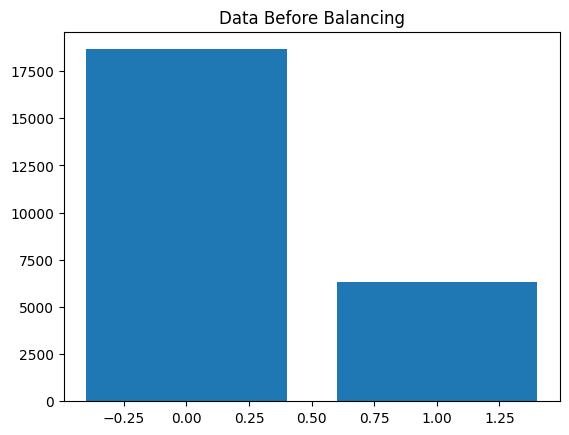

In [ ]:
# summarize distribution
counter = Counter(labels)
for k,v in counter.items():
 per = v / len(labels) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.title("Data Before Balancing")
pyplot.show()


In [ ]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
oversample = SMOTE()
Selected_Columns, labels = oversample.fit_resample(Selected_Columns, labels)
# summarize distribution
counter = Counter(labels)
for k,v in counter.items():
 per = v / len(labels) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=18657 (50.000%)
Class=1, n=18657 (50.000%)


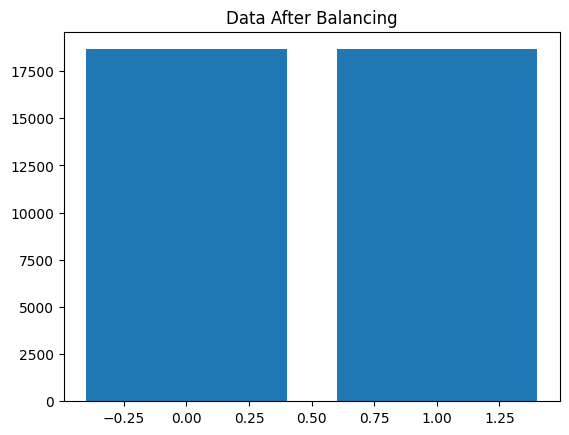

In [ ]:
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.title("Data After Balancing")
pyplot.show()

In [ ]:
num_features = len(Data_after_Droping_Columns.columns)
num_rows = (num_features + 4) // 5  # Calculate the number of rows needed for the subplot grid
num_cols = min(num_features, 5)  # Maximum 5 columns in the subplot grid

In [ ]:
Selected_Columns_df = pd.DataFrame(Selected_Columns)
labels_df = pd.DataFrame(labels)

# Concatenate the two DataFrames along the columns axis (axis=1)
Final_Data = pd.concat([Selected_Columns_df, labels_df], axis=1)

In [ ]:
Final_Data.head()

,Hospital,Hospital_type,Hospital_city,Bed_Grade,City_Code_Patient,Hospital_region,Department,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2.0,7.0,2,3,0,0,2,6,4911,0
1,2,2,5,2.0,7.0,2,3,1,0,2,6,5954,1
2,10,4,1,2.0,7.0,0,1,1,0,2,6,4745,0
3,26,1,2,2.0,7.0,1,3,1,0,2,6,7272,1
4,26,1,2,2.0,7.0,1,3,1,0,2,6,5558,1


In [ ]:
Selected_Columns = Final_Data[['Hospital','Hospital_type','Hospital_city','Bed_Grade','City_Code_Patient','Hospital_region','Department','Type of Admission','Illness_Severity','Patient_Visitors','Age','Admission_Deposit']]
labels = Final_Data['Stay_Days']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = Selected_Columns
y = labels
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                Specs         Score
11  Admission_Deposit  65899.318390
9    Patient_Visitors   6429.671772
8    Illness_Severity    399.686902
7   Type of Admission    396.125039
2       Hospital_city    305.398337
5     Hospital_region    223.188320
0            Hospital     92.264928
1       Hospital_type     41.488156
6          Department     41.359355
10                Age      7.594448
3           Bed_Grade      5.022250
4   City_Code_Patient      1.351416


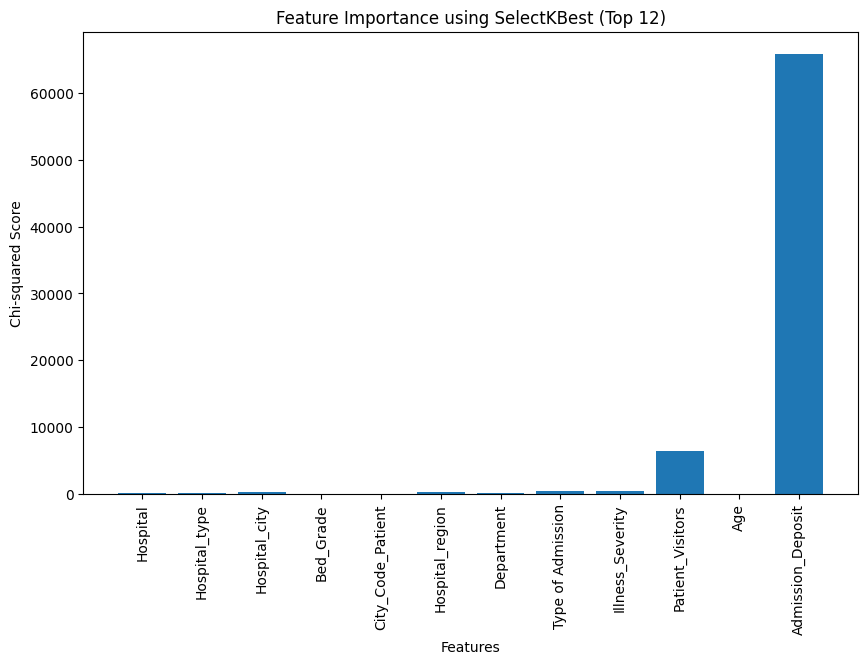

In [ ]:
# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(featureScores['Specs'])), featureScores['Score'])
plt.xticks(range(len(featureScores['Specs'])), featureScores['Specs'], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Chi-squared Score')
plt.title('Feature Importance using SelectKBest (Top 12)')
plt.show()

In [ ]:
Data_Columns_to_Normalize = Final_Data[['Admission_Deposit','Type of Admission','Patient_Visitors','Hospital_type','Age','Hospital','City_Code_Patient','Illness_Severity','Hospital_region','Bed_Grade','Patient_Visitors','Department']]
Outcome = Final_Data['Stay_Days']

In [ ]:
import pandas as pd
from sklearn import preprocessing

Data_for_Normilize = preprocessing.normalize(Data_Columns_to_Normalize, axis=0)

Scaled_Data_set = pd.DataFrame(Data_for_Normilize, columns=Data_Columns_to_Normalize.columns)

In [ ]:
Scaled_Data_set.head(5)

,Admission_Deposit,Type of Admission,Patient_Visitors,Hospital_type,Age,Hospital,City_Code_Patient,Illness_Severity,Hospital_region,Bed_Grade,Patient_Visitors,Department
0,0.005027,0.000000,0.002574,0.005362,0.005475,0.001997,0.004503,0.0,0.010288,0.003704,0.002574,0.007891
1,0.006094,0.005679,0.002574,0.005362,0.005475,0.000499,0.004503,0.0,0.010288,0.003704,0.002574,0.007891
2,0.004857,0.005679,0.002574,0.010725,0.005475,0.002496,0.004503,0.0,0.000000,0.003704,0.002574,0.002630
3,0.007444,0.005679,0.002574,0.002681,0.005475,0.006491,0.004503,0.0,0.005144,0.003704,0.002574,0.007891
4,0.005689,0.005679,0.002574,0.002681,0.005475,0.006491,0.004503,0.0,0.005144,0.003704,0.002574,0.007891


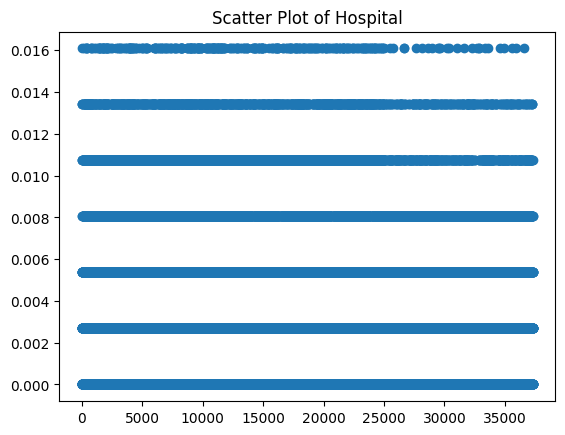

In [ ]:
plt.scatter(Scaled_Data_set.index,Scaled_Data_set['Hospital_type'])
plt.title('Scatter Plot of Hospital')
plt.show()

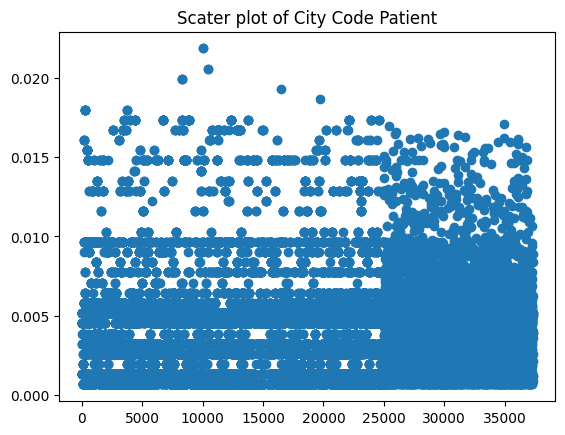

In [ ]:
plt.scatter(Scaled_Data_set.index,Scaled_Data_set['City_Code_Patient'])
plt.title('Scater plot of City Code Patient')
plt.show()

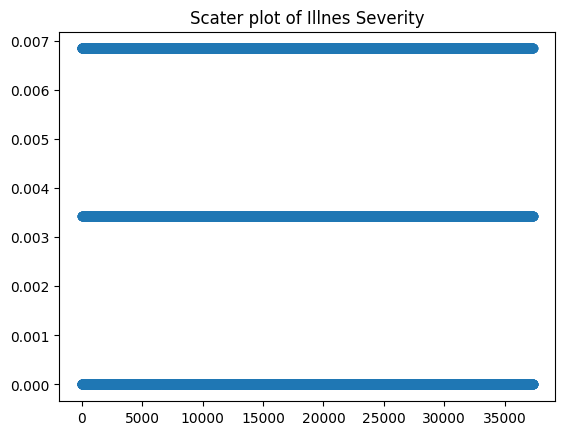

In [ ]:
plt.scatter(Scaled_Data_set.index,Scaled_Data_set['Illness_Severity'])
plt.title('Scater plot of Illnes Severity')
plt.show()

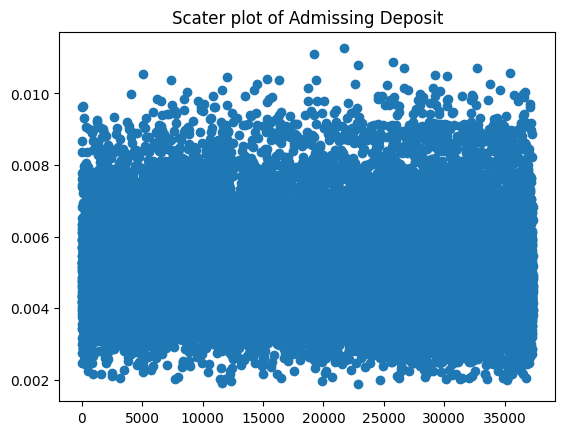

In [ ]:
plt.scatter(Scaled_Data_set.index,Scaled_Data_set['Admission_Deposit'])
plt.title('Scater plot of Admissing Deposit')
plt.show()


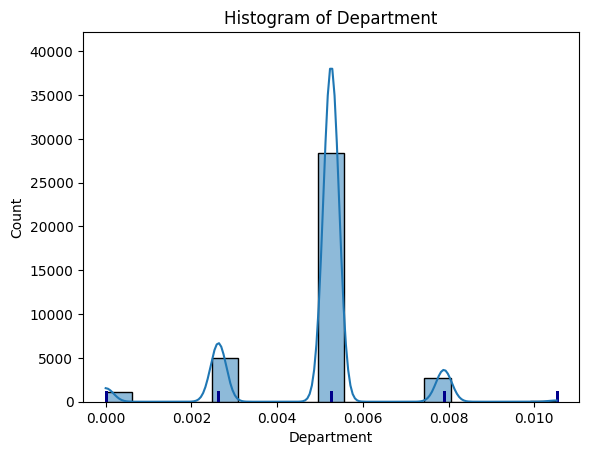

In [ ]:
sns.rugplot(x='Department', data=Scaled_Data_set, height=.03, color='darkblue')
sns.histplot(x='Department', data=Scaled_Data_set, kde=True)
plt.title('Histogram of Department')
plt.show()

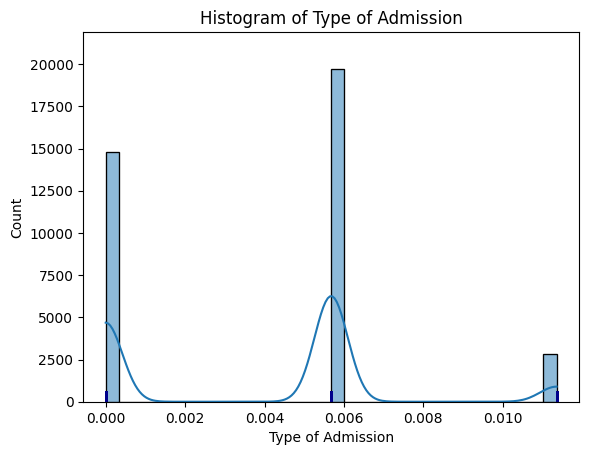

In [ ]:
sns.rugplot(x='Type of Admission', data=Scaled_Data_set, height=.03, color='darkblue')
sns.histplot(x='Type of Admission', data=Scaled_Data_set, kde=True)
plt.title('Histogram of Type of Admission')
plt.show()

<Axes: xlabel='Illness_Severity', ylabel='Count'>

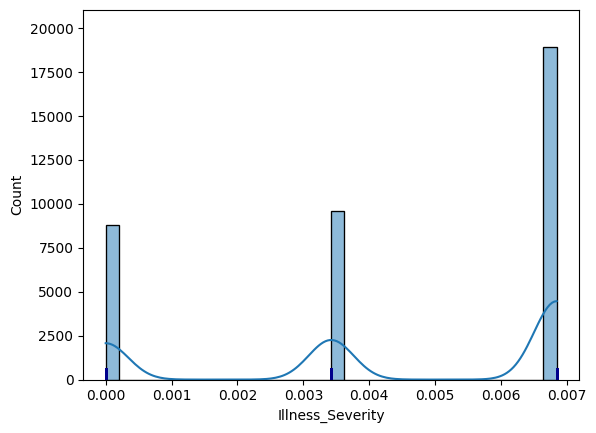

In [ ]:
sns.rugplot(x='Illness_Severity', data=Scaled_Data_set, height=.03, color='darkblue')
sns.histplot(x='Illness_Severity', data=Scaled_Data_set, kde=True)

<Axes: xlabel='Stay_Days', ylabel='Count'>

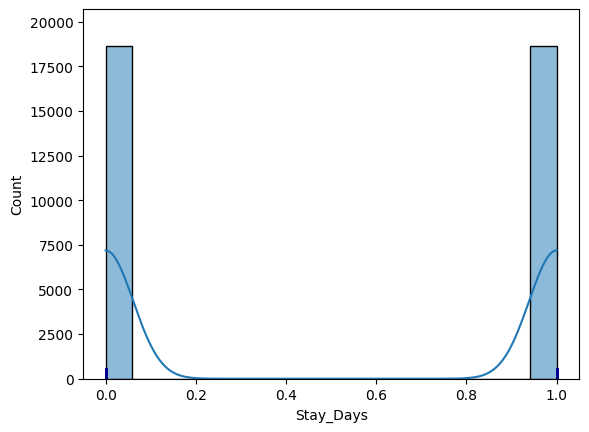

In [ ]:
sns.rugplot(x=Outcome, data=Scaled_Data_set, height=.03, color='darkblue')
sns.histplot(x=Outcome, data=Scaled_Data_set, kde=True)

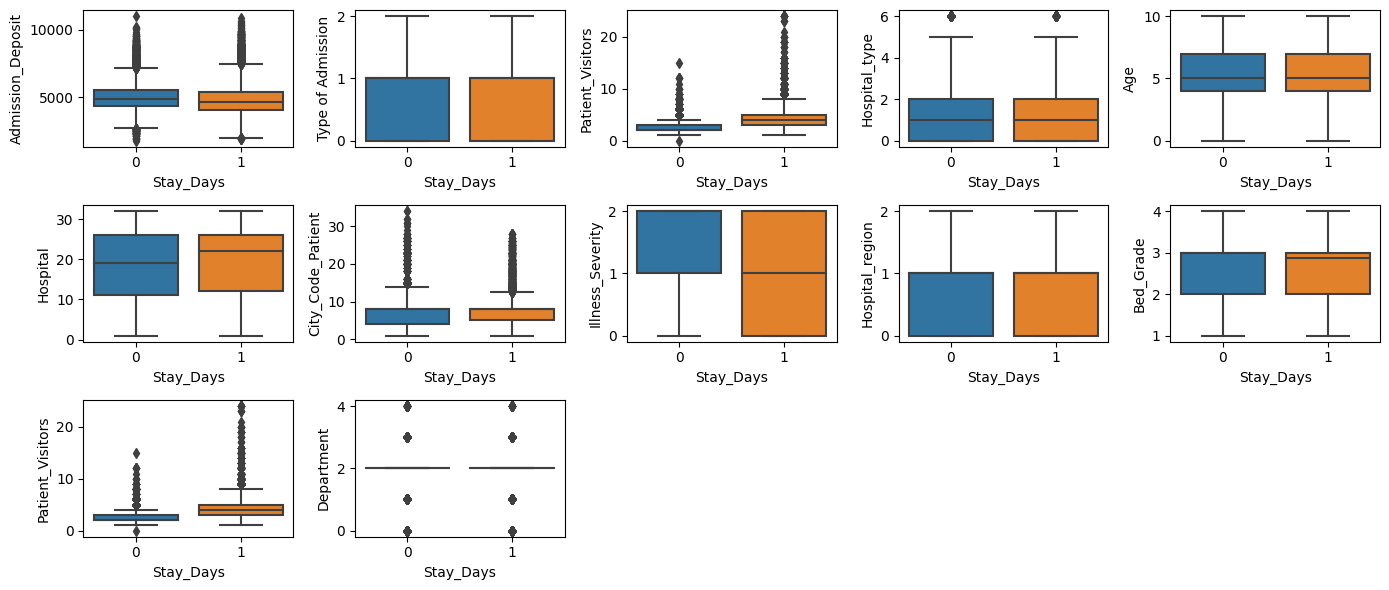

In [ ]:
# Boxplots for each feature grouped by class
plt.figure(figsize=(14, 2*num_rows))
for i, feature in enumerate(Scaled_Data_set.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x='Stay_Days', y=feature, data=Final_Data)
plt.tight_layout()
plt.show()

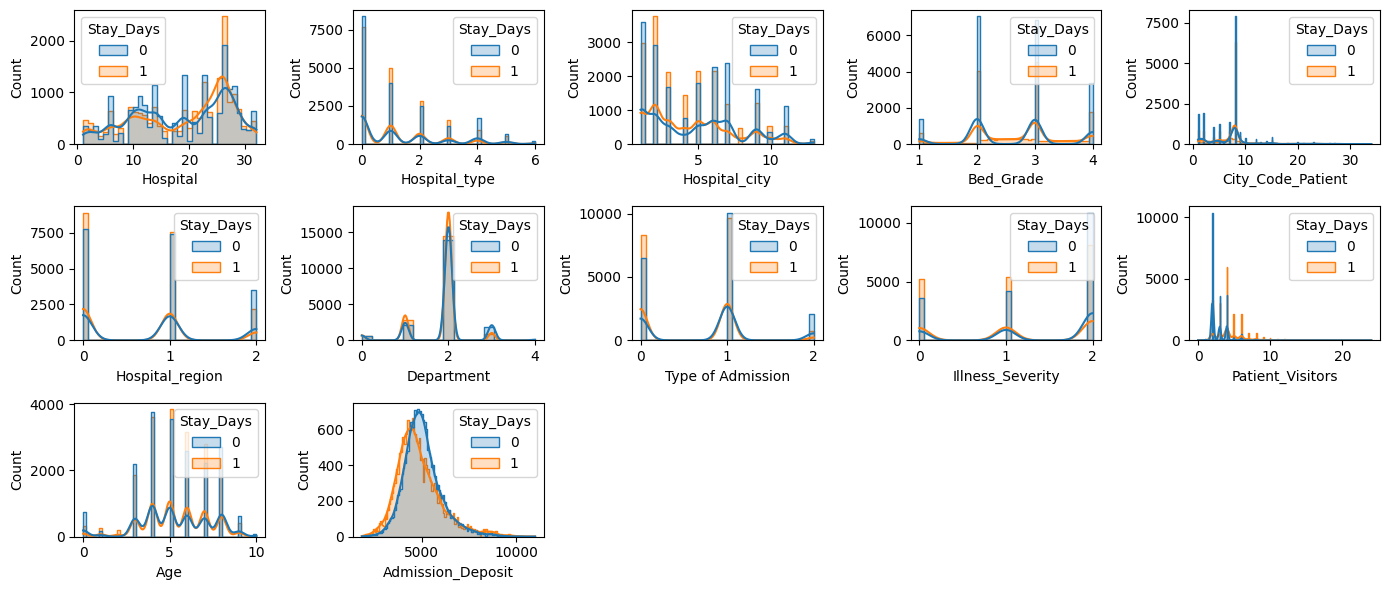

In [ ]:
lis=list(Final_Data.columns)
# Histograms for each feature grouped by class
plt.figure(figsize=(14, 2*num_rows))
for i, feature in enumerate(lis[:-1]):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(data=Final_Data, x=feature, hue='Stay_Days', element='step', kde=True)
plt.tight_layout()
plt.show()

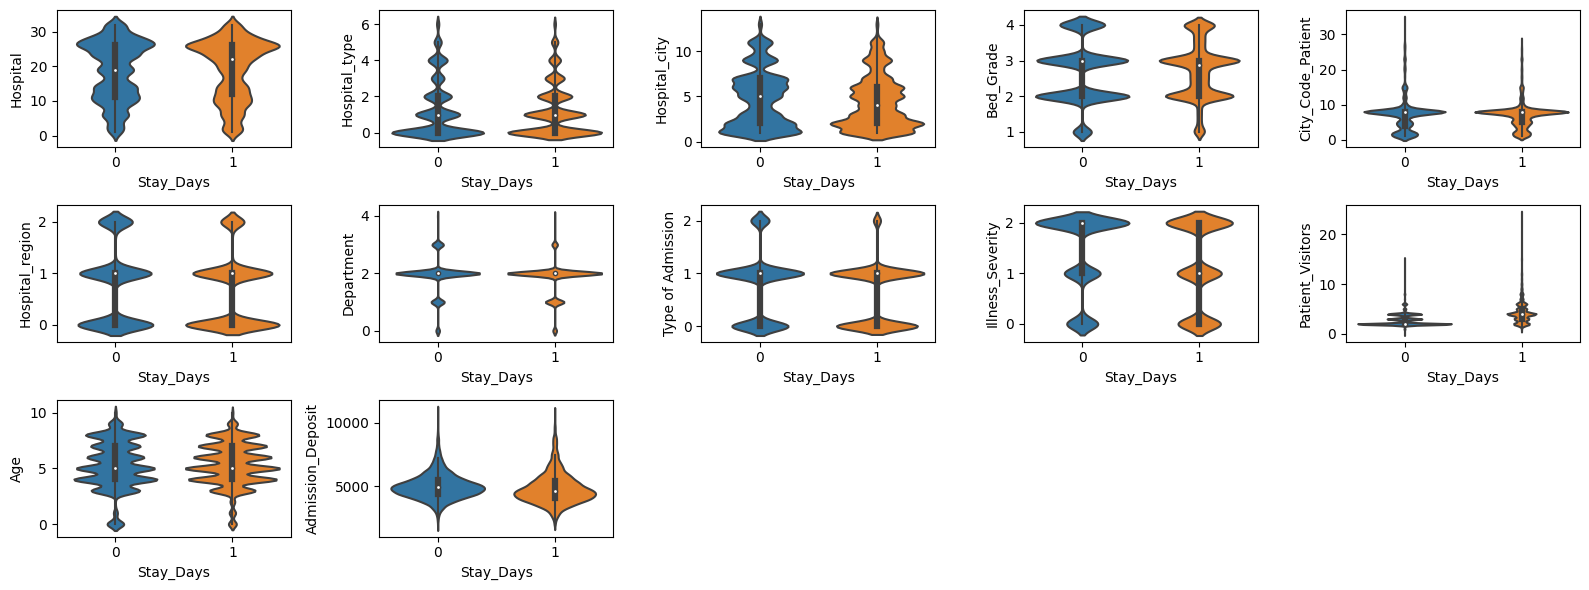

In [ ]:
# Violin plots for each feature grouped by class
plt.figure(figsize=(16, 2*num_rows))
for i, feature in enumerate(lis[:-1]):
    plt.subplot(num_rows, num_cols, i+1)
    sns.violinplot(x='Stay_Days', y=feature, data=Final_Data)
plt.tight_layout()
plt.show()

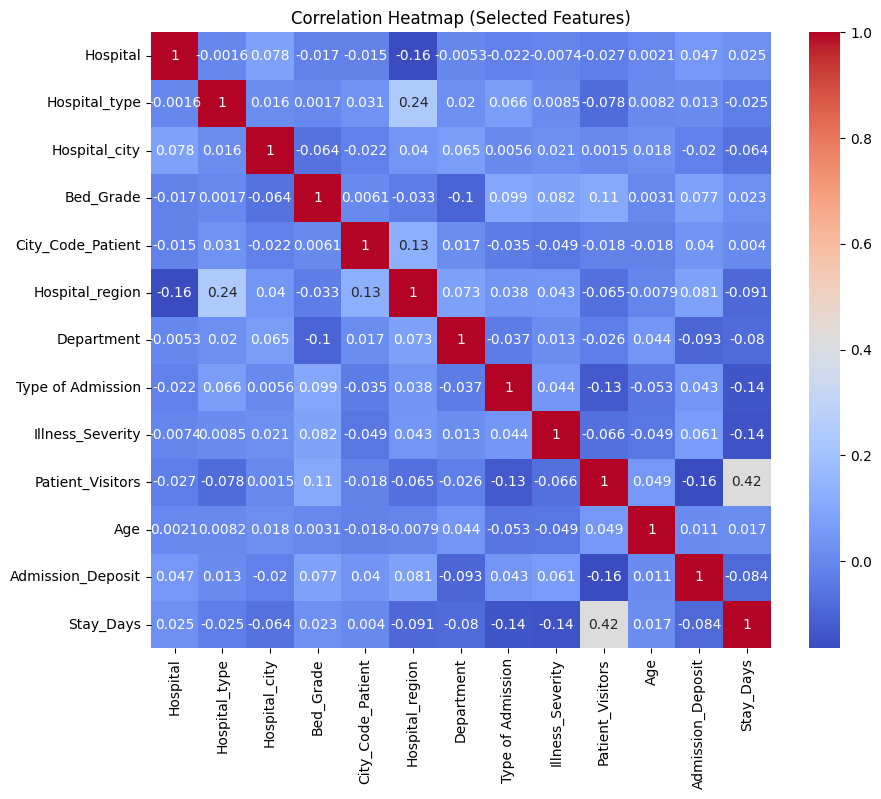

In [ ]:
# Correlation Heatmap (with selected features):
plt.figure(figsize=(10, 8))
sns.heatmap(Final_Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

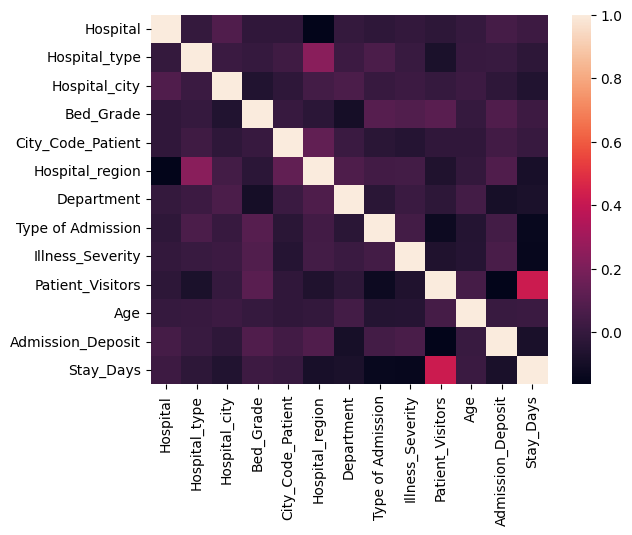

In [ ]:
#creates a heatmap of the correlation matrix of the DataFrame
import seaborn as sns
sns.heatmap(Final_Data.corr());

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Scaled_Data_set, Outcome, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
# train the model on train set
SVM_model = SVC(kernel ="poly",decision_function_shape="ovr")
SVM_model.fit(X_train, y_train)

# print prediction results
predictions = SVM_model.predict(X_test)
print("\nClassification Report of SVM:\n",classification_report(y_test, predictions))


Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      3796
           1       0.74      0.75      0.75      3667

    accuracy                           0.75      7463
   macro avg       0.75      0.75      0.75      7463
weighted avg       0.75      0.75      0.75      7463



In [ ]:
# Make the predictions
SVM_Model_Prediction = SVM_model.predict(X_test)

# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, SVM_Model_Prediction))

Accuracy score 0.75


In [ ]:
# Print the confusion matrix
SVM_Confusion_mat = confusion_matrix(y_test, SVM_Model_Prediction)
print("Confusion Matrix:")
print(SVM_Confusion_mat)

Confusion Matrix:
[[2826  970]
 [ 914 2753]]


In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

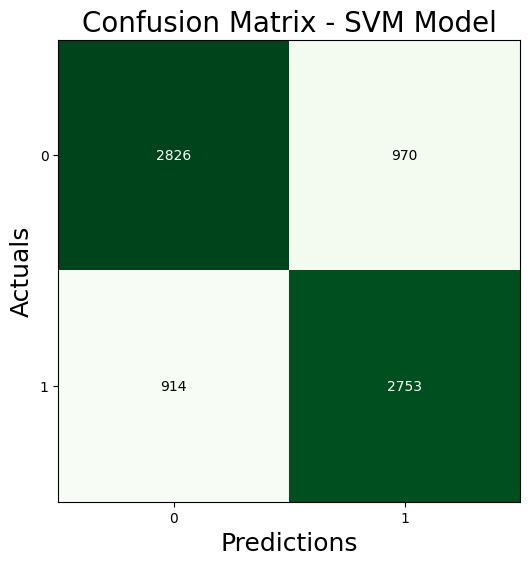

In [ ]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=SVM_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - SVM Model', fontsize=20)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
KNN_Model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
KNN_Model.fit(X_train, y_train)

# print prediction results
KNN_Model_Prediction = KNN_Model.predict(X_test)
print("\nClassification Report of KNN:\n",classification_report(y_test, KNN_Model_Prediction))


Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      3796
           1       0.74      0.74      0.74      3667

    accuracy                           0.75      7463
   macro avg       0.75      0.75      0.75      7463
weighted avg       0.75      0.75      0.75      7463



In [ ]:
# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, KNN_Model_Prediction))

Accuracy score 0.75


In [ ]:
# Print the confusion matrix
KNN_Confusion_mat = confusion_matrix(y_test, KNN_Model_Prediction)
print("Confusion Matrix:")
print(KNN_Confusion_mat)

Confusion Matrix:
[[2860  936]
 [ 942 2725]]


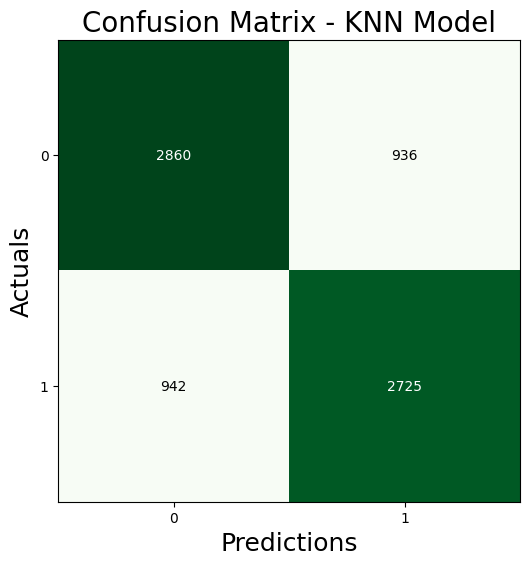

In [ ]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=KNN_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - KNN Model', fontsize=20)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
Logist_model = LogisticRegression()

# Fit the model on the training data
Logist_model.fit(X_train, y_train)

# Make predictions on the test data
Logist_model_pred = Logist_model.predict(X_test)

# Print classification report
print("\nClassification Report of Logistic Regression:\n",classification_report(y_test, Logist_model_pred))



Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      3796
           1       0.70      0.69      0.69      3667

    accuracy                           0.70      7463
   macro avg       0.70      0.70      0.70      7463
weighted avg       0.70      0.70      0.70      7463



In [ ]:
# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, Logist_model_pred))

Accuracy score 0.70


In [ ]:
# Print the confusion matrix
Logistic_Confusion_mat = confusion_matrix(y_test, Logist_model_pred)
print("Confusion Matrix:")
print(Logistic_Confusion_mat)

Confusion Matrix:
[[2712 1084]
 [1149 2518]]


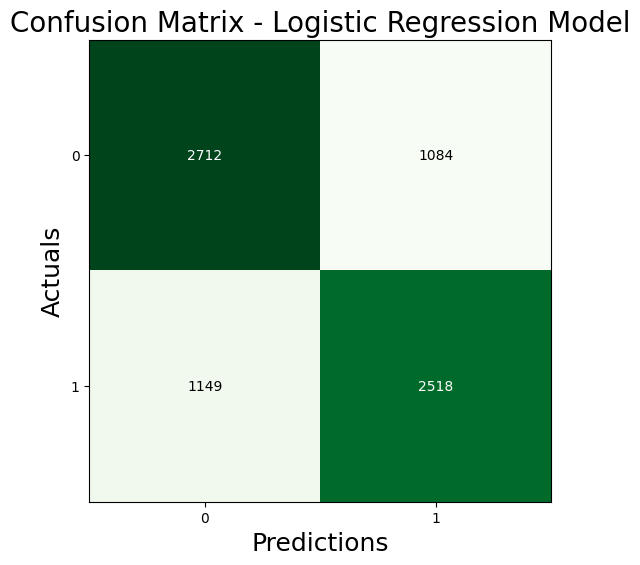

In [ ]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=Logistic_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Logistic Regression Model', fontsize=20)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
Tunning_model_Logistic = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(Tunning_model_Logistic, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7198082247211349
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Decision_Tree_model = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
Decision_Tree_model.fit(X_train, y_train)

# Make predictions on the test data
Decision_Tree_pred = Decision_Tree_model.predict(X_test)

# Print classification report
print("\nClassification Report of Decision Tree:\n",classification_report(y_test, Decision_Tree_pred))


Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      3796
           1       0.78      0.80      0.79      3667

    accuracy                           0.79      7463
   macro avg       0.79      0.79      0.79      7463
weighted avg       0.79      0.79      0.79      7463



In [ ]:
# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, Decision_Tree_pred))

Accuracy score 0.79


In [ ]:
# Print the confusion matrix
Decision_tree_Confusion_mat = confusion_matrix(y_test, Decision_Tree_pred)
print("Confusion Matrix:")
print(Decision_tree_Confusion_mat)

Confusion Matrix:
[[2986  810]
 [ 739 2928]]


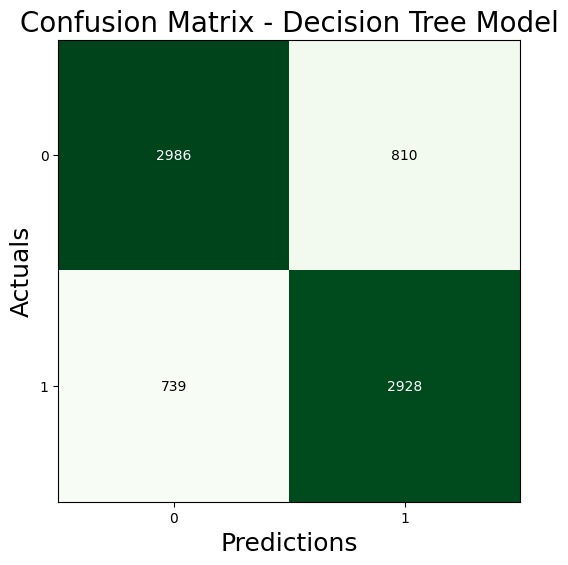

In [ ]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=Decision_tree_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Decision Tree Model', fontsize=20)
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
Gd_B_Model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage for boosting
    objective='binary:logistic',  # Binary classification objective function
    random_state=42
)

# Train the model
Gd_B_Model.fit(np.array(X_train), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
Gd_B_Pred = Gd_B_Model.predict(X_test)

# You can also get more detailed metrics using classification_report
gd_B_Acc_Report = classification_report(y_test, Gd_B_Pred)
print("Classification Report of XGBoost:\n", gd_B_Acc_Report)


Classification Report of XGBoost:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      3796
           1       0.86      0.79      0.82      3667

    accuracy                           0.83      7463
   macro avg       0.83      0.83      0.83      7463
weighted avg       0.83      0.83      0.83      7463



In [ ]:
# Measure the performance
# Evaluate the model
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, Gd_B_Pred))

Accuracy score 0.83


In [ ]:
# Print the confusion matrix
Gd_B_Mat = confusion_matrix(y_test, Gd_B_Pred)
print("Confusion Matrix:")
print(Gd_B_Mat)

Confusion Matrix:
[[3320  476]
 [ 786 2881]]


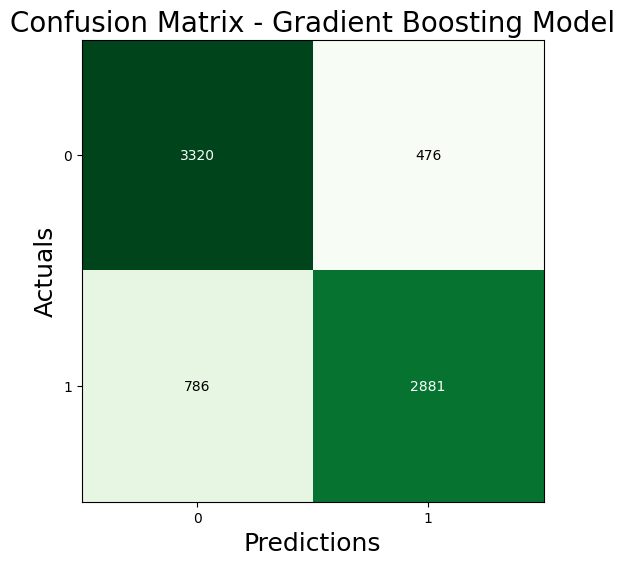

In [ ]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=Gd_B_Mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Gradient Boosting Model', fontsize=20)
plt.show()

In [ ]:
# Make predictions using the 5 models
Pred_Model_1 = SVM_Model_Prediction   # Assuming SVM_Model_Prediction contains predicted probabilities
Pred_Model_2 = Decision_Tree_model.predict_proba(X_test)[:, 1]
Pred_Model_3 = KNN_Model_Prediction   # Assuming KNN_Model_Prediction contains predicted labels (not probabilities)
Pred_Model_4 = Logist_model.predict_proba(X_test)[:, 1]
Pred_Model_5 = Gd_B_Model.predict_proba(X_test)[:, 1]

In [ ]:
# Average the predicted probabilities of all models to create an ensemble
Ensemble_Pred = (Pred_Model_1 + Pred_Model_2 + Pred_Model_3 + Pred_Model_4 + Pred_Model_5) / 5

# Ensure the ensemble predictions lie between 0 and 1
Ensemble_Pred = np.clip(Ensemble_Pred, 0, 1)

# Convert the averaged probabilities to binary class labels (0 or 1)
Ensemble_Pred_Binary = np.round(Ensemble_Pred)

# Calculate the accuracy of the ensemble model
Ensemble_Accuracy = accuracy_score(y_test, Ensemble_Pred_Binary)
print(f"Ensemble Model Accuracy: {Ensemble_Accuracy:.3f}")

Ensemble Model Accuracy: 0.798


In [ ]:
# Calculate the accuracy of each individual model
Model_1_Accuracy = accuracy_score(y_test, np.round(Pred_Model_1))
Model_2_Accuracy = accuracy_score(y_test, np.round(Pred_Model_2))
Model_3_Accuracy = accuracy_score(y_test, Pred_Model_3)
Model_4_Accuracy = accuracy_score(y_test, np.round(Pred_Model_4))
Model_5_Accuracy = accuracy_score(y_test, np.round(Pred_Model_5))

# Find the model with the best accuracy
Best_Accuracy_Model = np.argmax([Model_1_Accuracy, Model_2_Accuracy, Model_3_Accuracy, Model_4_Accuracy, Model_5_Accuracy, Ensemble_Accuracy])
Best_Accuracy_Value = max([Model_1_Accuracy, Model_2_Accuracy, Model_3_Accuracy, Model_4_Accuracy, Model_5_Accuracy, Ensemble_Accuracy])

In [ ]:
# Print the results
print(f"Model 1 SVM Accuracy: {Model_1_Accuracy:.3f}")
print(f"Model 2 Decision Tree Accuracy: {Model_2_Accuracy:.3f}")
print(f"Model 3 KNN Accuracy: {Model_3_Accuracy:.3f}")
print(f"Model 4 Logist Regression Accuracy: {Model_4_Accuracy:.3f}")
print(f"Model 5 Gradient Boosting: {Model_5_Accuracy:.3f}")
print(f"Ensemble Model Accuracy: {Ensemble_Accuracy:.3f}")

print(f"Best Accuracy Model: Model {Best_Accuracy_Model + 1}, Accuracy: {Best_Accuracy_Value:.3f}")

Model 1 SVM Accuracy: 0.748
Model 2 Decision Tree Accuracy: 0.792
Model 3 KNN Accuracy: 0.748
Model 4 Logist Regression Accuracy: 0.701
Model 5 Gradient Boosting: 0.831
Ensemble Model Accuracy: 0.798
Best Accuracy Model: Model 5, Accuracy: 0.831


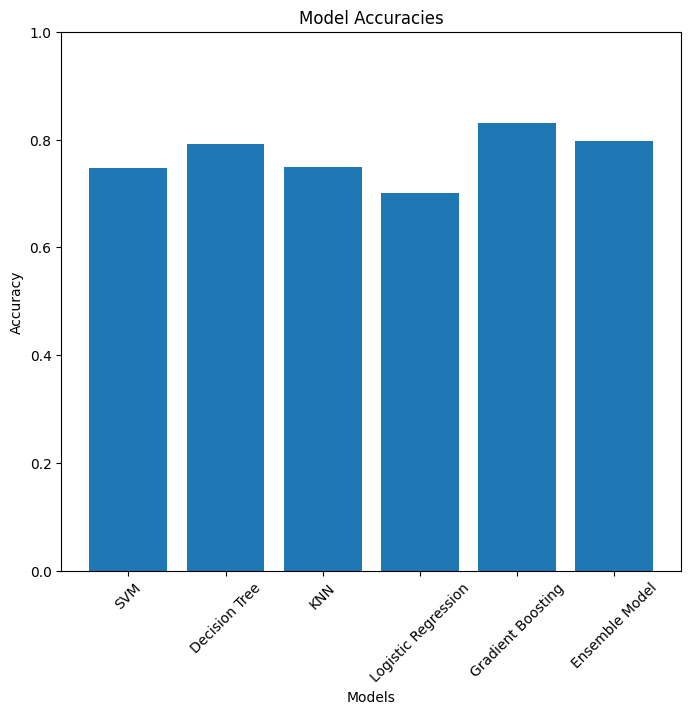

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the accuracies
model_accuracies = [Model_1_Accuracy, Model_2_Accuracy, Model_3_Accuracy, Model_4_Accuracy, Model_5_Accuracy,Ensemble_Accuracy]

# Models' names
model_names = ['SVM', 'Decision Tree', 'KNN', 'Logistic Regression','Gradient Boosting', 'Ensemble Model']

# Create a bar plot
plt.figure(figsize=(8, 7))
plt.bar(model_names, model_accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.title('Model Accuracies')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

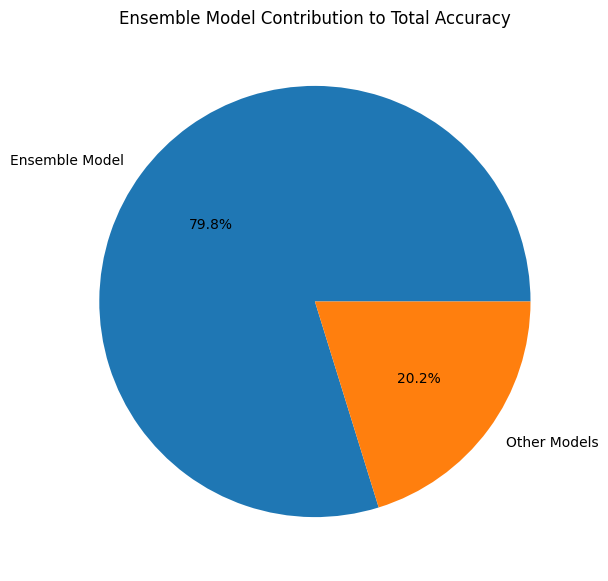

In [ ]:
# Create a pie chart for the Ensemble model
plt.figure(figsize=(8, 7))
plt.pie([model_accuracies[-1], 1 - model_accuracies[-1]], labels=['Ensemble Model', 'Other Models'], autopct='%1.1f%%')
plt.title('Ensemble Model Contribution to Total Accuracy')
plt.show()

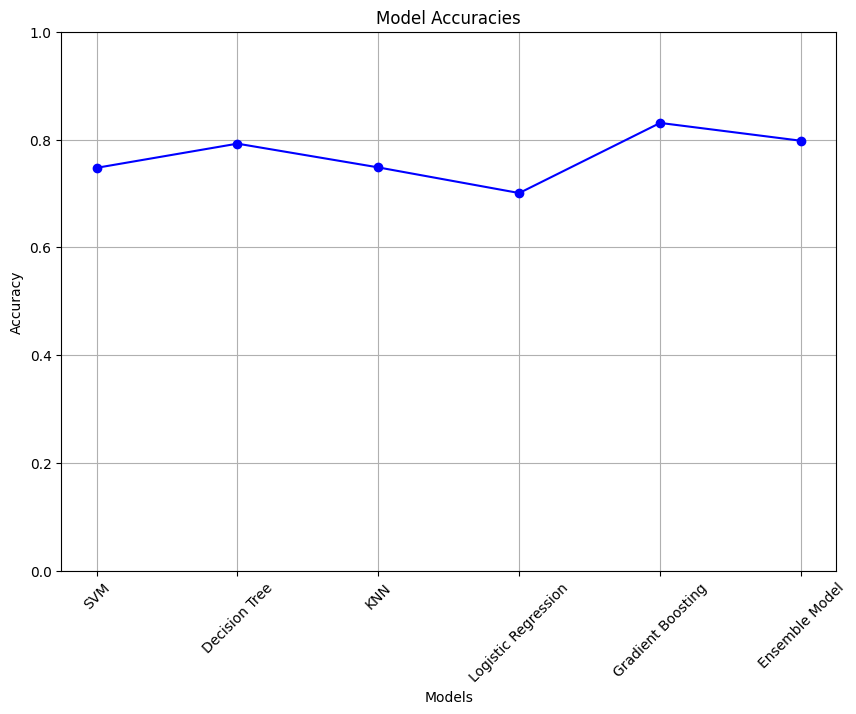

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated the accuracies
model_accuracies = [Model_1_Accuracy, Model_2_Accuracy, Model_3_Accuracy, Model_4_Accuracy, Model_5_Accuracy, Ensemble_Accuracy]

# Models' names
model_names = ['SVM', 'Decision Tree', 'KNN', 'Logistic Regression', 'Gradient Boosting', 'Ensemble Model']

# Create a line plot for model accuracies
plt.figure(figsize=(10, 7))
plt.plot(model_names, model_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.title('Model Accuracies')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)  # Add grid lines for better readability
plt.show()


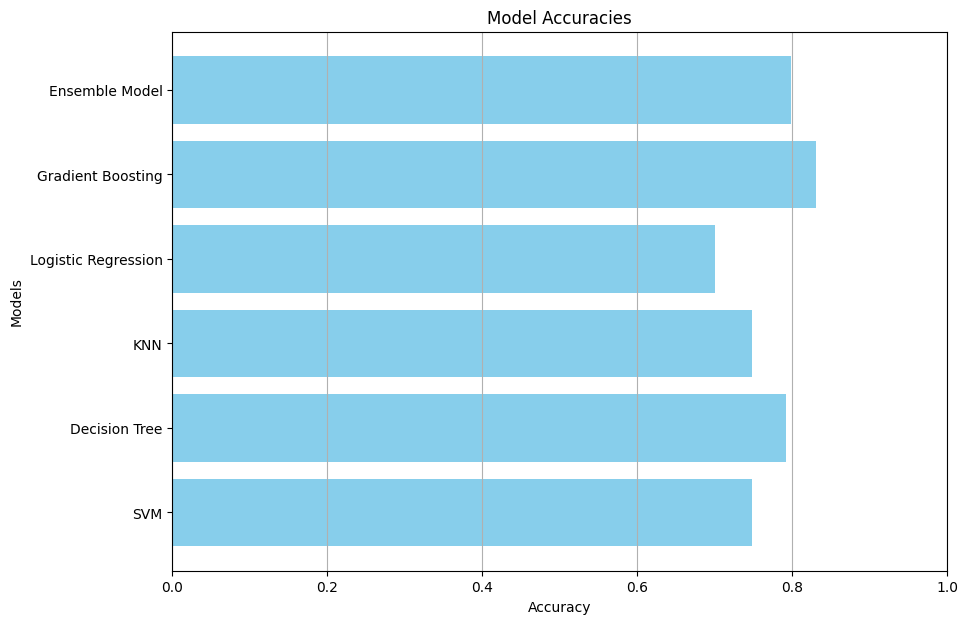

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated the accuracies
model_accuracies = [Model_1_Accuracy, Model_2_Accuracy, Model_3_Accuracy, Model_4_Accuracy, Model_5_Accuracy, Ensemble_Accuracy]

# Models' names
model_names = ['SVM', 'Decision Tree', 'KNN', 'Logistic Regression', 'Gradient Boosting', 'Ensemble Model']

# Create a horizontal bar plot for model accuracies
plt.figure(figsize=(10, 7))
plt.barh(model_names, model_accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)  # Set the x-axis limit to be between 0 and 1
plt.title('Model Accuracies')
plt.grid(axis='x')  # Add grid lines on the x-axis for better readability
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the input features (optional, but recommended for better convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create the CNN model
CNN_model = Sequential()
CNN_model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
CNN_model.add(MaxPooling1D(2))
CNN_model.add(Conv1D(64, 3, activation='relu'))
CNN_model.add(MaxPooling1D(2))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
from tensorflow.keras.utils import plot_model

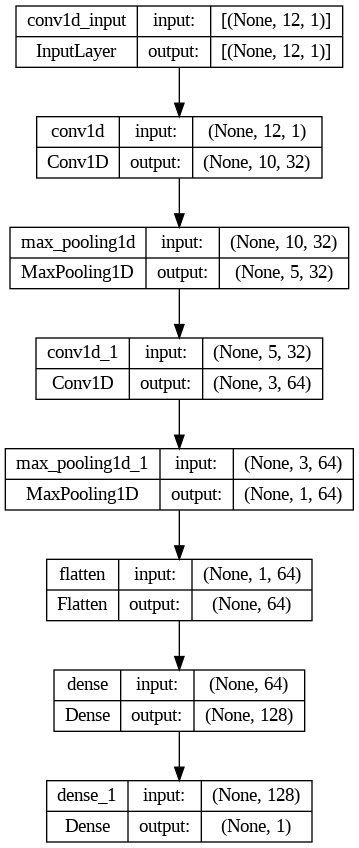

In [ ]:
# Plot the model graph
plot_model(CNN_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model
CNN_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
History_of_CNN=CNN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
747/747 [==============================] - 12s 4ms/step - loss: 0.6534 - accuracy: 0.6181 - val_loss: 0.6085 - val_accuracy: 0.6801
Epoch 2/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5925 - accuracy: 0.6860 - val_loss: 0.5728 - val_accuracy: 0.7074
Epoch 3/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5683 - accuracy: 0.7086 - val_loss: 0.5552 - val_accuracy: 0.7220
Epoch 4/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5553 - accuracy: 0.7188 - val_loss: 0.5441 - val_accuracy: 0.7320
Epoch 5/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5470 - accuracy: 0.7248 - val_loss: 0.5370 - val_accuracy: 0.7351
Epoch 6/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5397 - accuracy: 0.7312 - val_loss: 0.5336 - val_accuracy: 0.7379
Epoch 7/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5341 - accuracy: 0.7354 - val_loss: 0.5256 - val_accuracy: 0.745

In [ ]:
# Evaluate the model on the test data
CNN_Pred_Prob = CNN_model.predict(X_test)
CNN_Pred = (CNN_Pred_Prob > 0.5).astype(int)
CNN_Accuracy = accuracy_score(y_test, CNN_Pred)

234/234 [==============================] - 1s 2ms/step


In [ ]:
print(f"Accuracy: {CNN_Accuracy:.3f}")

Accuracy: 0.761


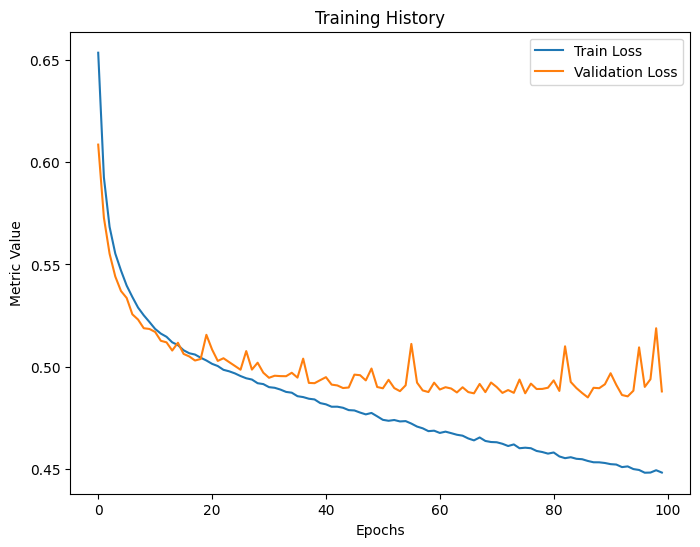

In [ ]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(History_of_CNN.history['loss'], label='Train Loss')
plt.plot(History_of_CNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Training History')
plt.show()

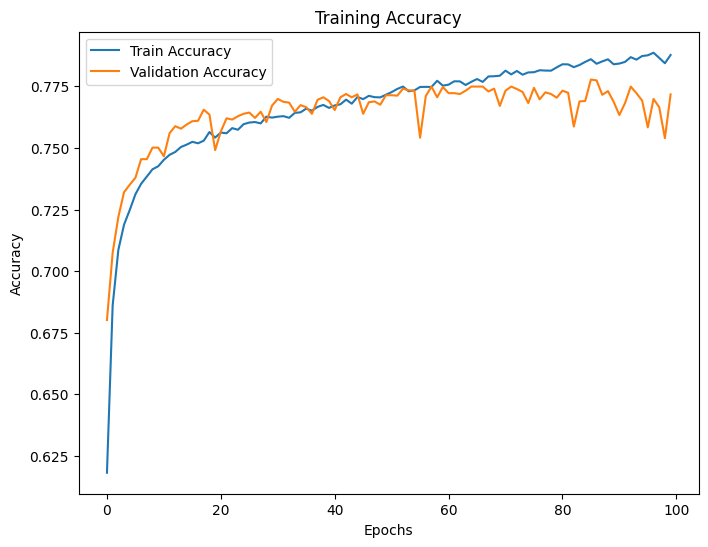

In [ ]:
# Plot the accuracy during training
plt.figure(figsize=(8, 6))
plt.plot(History_of_CNN.history['accuracy'], label='Train Accuracy')
plt.plot(History_of_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define the wide input as a feature-crossed version of categorical features or one-hot-encoded features
# You can use other feature engineering techniques as well depending on your data
wide_input = tf.keras.layers.Input(shape=(X_train.shape[1],), name='wide_input')

# Define the deep input
deep_input = tf.keras.layers.Input(shape=(X_train.shape[1],), name='deep_input')

# Create the wide part (linear model)
wide_output = tf.keras.layers.Dense(1, activation='sigmoid', name='wide_output')(wide_input)

# Create the deep part (deep neural network)
deep_output = tf.keras.layers.Dense(32, activation='relu')(deep_input)
deep_output = tf.keras.layers.Dense(16, activation='relu')(deep_output)
deep_output = tf.keras.layers.Dense(1, activation='sigmoid', name='deep_output')(deep_output)

# Concatenate the outputs of the wide and deep parts
combined_output = tf.keras.layers.concatenate([wide_output, deep_output])

In [ ]:
# Create the final model
Wide_model = tf.keras.Model(inputs=[wide_input, deep_input], outputs=combined_output)
Wide_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 12)]         0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 32)           416         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 12)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 16)           528         ['dense_2[0][0]']                
                                                                                              

In [ ]:
# Compile the model
Wide_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

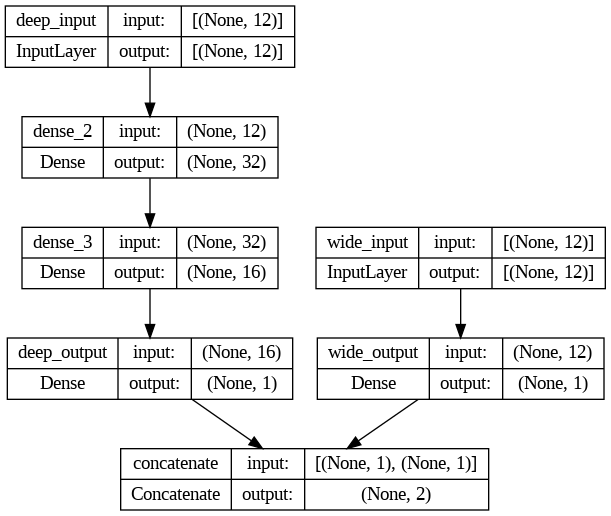

In [ ]:
# Plot the model graph
plot_model(Wide_model, to_file='Wide_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
Wide_History = Wide_model.fit([X_train, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
747/747 [==============================] - 6s 4ms/step - loss: 0.7075 - accuracy: 0.6920 - val_loss: 0.5947 - val_accuracy: 0.7290
Epoch 2/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5688 - accuracy: 0.7181 - val_loss: 0.5455 - val_accuracy: 0.7109
Epoch 3/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5443 - accuracy: 0.6950 - val_loss: 0.5337 - val_accuracy: 0.6751
Epoch 4/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5377 - accuracy: 0.6575 - val_loss: 0.5289 - val_accuracy: 0.6446
Epoch 5/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5352 - accuracy: 0.6371 - val_loss: 0.5275 - val_accuracy: 0.6542
Epoch 6/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5335 - accuracy: 0.6353 - val_loss: 0.5278 - val_accuracy: 0.6284
Epoch 7/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5318 - accuracy: 0.6422 - val_loss: 0.5254 - val_accuracy: 0.6305

In [ ]:
# Evaluate the model on the test set
wide_test_loss, wide_test_accuracy = Wide_model.evaluate([X_test, X_test], y_test)

234/234 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.6619


In [ ]:
print(f"Test Loss: {wide_test_loss:.4f}, Test Accuracy: {wide_test_accuracy:.4f}")

Test Loss: 0.5329, Test Accuracy: 0.6619


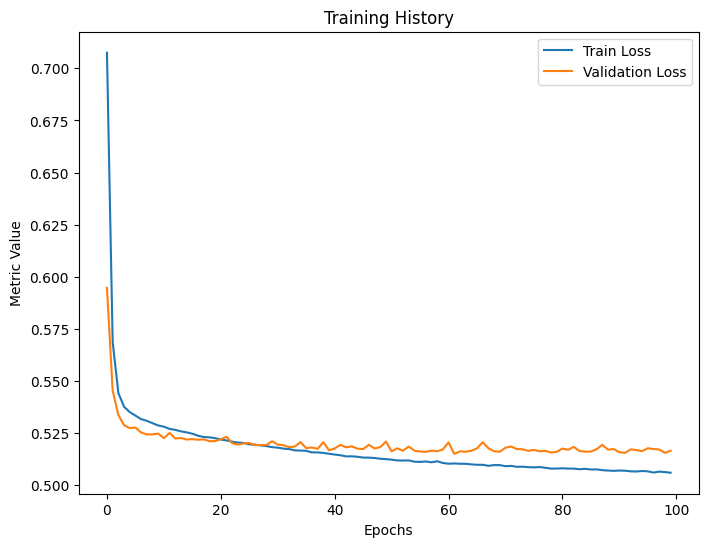

In [ ]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(Wide_History.history['loss'], label='Train Loss')
plt.plot(Wide_History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Training History')
plt.show()

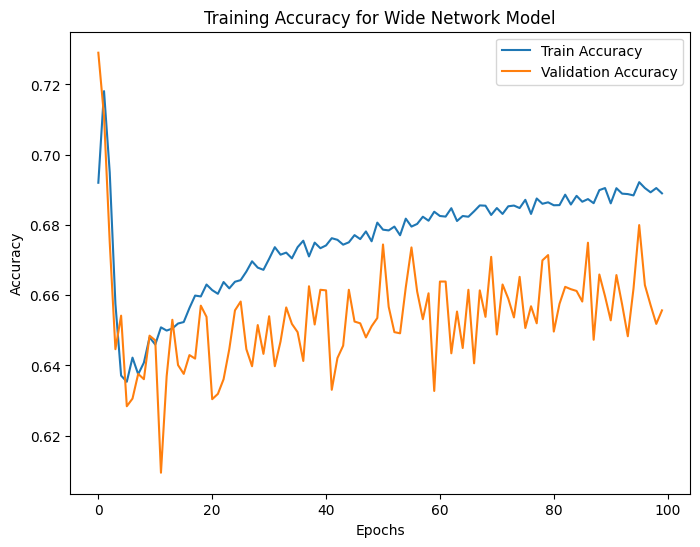

In [ ]:
# Plot the accuracy during training
plt.figure(figsize=(8, 6))
plt.plot(Wide_History.history['accuracy'], label='Train Accuracy')
plt.plot(Wide_History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy for Wide Network Model')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create the autoencoder model using Keras (TensorFlow)
input_dim = X_train.shape[1]

# Encoder part of the autoencoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(16, activation='relu')
])

# Decoder part of the autoencoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(input_dim, activation='linear')
])

# Combine encoder and decoder to form the autoencoder model
autoencoder = tf.keras.Sequential([
    encoder,
    decoder
])

In [ ]:
# Use the encoder to extract features from the data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

234/234 [==============================] - 0s 1ms/step


In [ ]:
# Create the binary classification model using the encoded features
Autoen_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(16,)),  # 16 is the size of the encoded features
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the binary classification model
Autoen_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Autoen_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


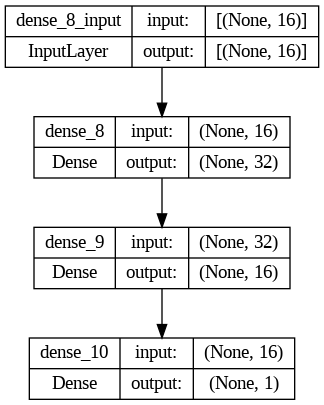

In [ ]:
# Plot the model graph
plot_model(Autoen_model, to_file='Autoen_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the binary classification model using the encoded features
Auto_Encode_History = Autoen_model.fit(X_train_encoded, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
747/747 [==============================] - 4s 4ms/step - loss: 0.6235 - accuracy: 0.6531 - val_loss: 0.6058 - val_accuracy: 0.6753
Epoch 2/100
747/747 [==============================] - 3s 4ms/step - loss: 0.6018 - accuracy: 0.6704 - val_loss: 0.5924 - val_accuracy: 0.6811
Epoch 3/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5935 - accuracy: 0.6830 - val_loss: 0.5852 - val_accuracy: 0.6913
Epoch 4/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5876 - accuracy: 0.6847 - val_loss: 0.5939 - val_accuracy: 0.6796
Epoch 5/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5834 - accuracy: 0.6892 - val_loss: 0.5847 - val_accuracy: 0.6913
Epoch 6/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5802 - accuracy: 0.6919 - val_loss: 0.5785 - val_accuracy: 0.6987
Epoch 7/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5784 - accuracy: 0.6936 - val_loss: 0.5772 - val_accuracy: 0.7009

In [ ]:
# Evaluate the binary classification model on the test set
test_loss, test_accuracy = Autoen_model.evaluate(X_test_encoded, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

234/234 [==============================] - 1s 2ms/step - loss: 0.5785 - accuracy: 0.7004
Test Loss: 0.5785, Test Accuracy: 0.7004


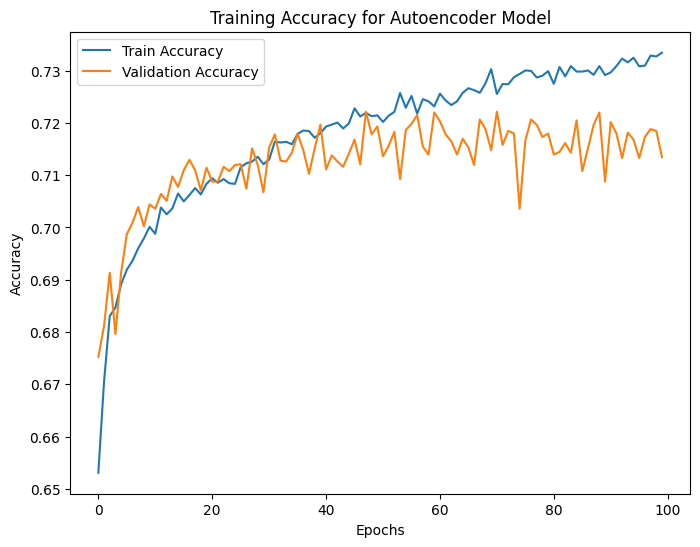

In [ ]:
# Plot the accuracy during training
plt.figure(figsize=(8, 6))
plt.plot(Auto_Encode_History.history['accuracy'], label='Train Accuracy')
plt.plot(Auto_Encode_History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy for Autoencoder Model')
plt.show()

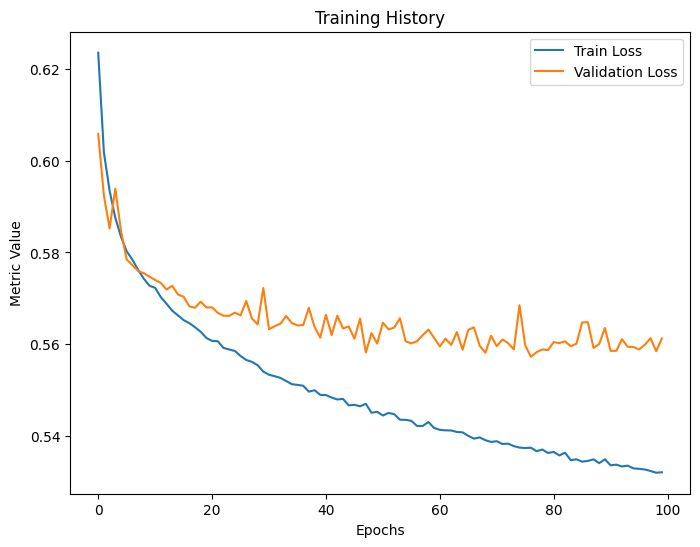

In [ ]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(Auto_Encode_History.history['loss'], label='Train Loss')
plt.plot(Auto_Encode_History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Training History')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of individual models in the ensemble
num_models = 3

# Create empty lists to store training and validation accuracy history for each model
train_acc_history = []
val_acc_history = []

# Create and train individual models
individual_models = [CNN_model, Wide_model, autoencoder]
for i in range(num_models):
    Ensemble_model_deep = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    Ensemble_model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = Ensemble_model_deep.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

    # Append the accuracy history to the respective lists
    train_acc_history.append(history.history['accuracy'])
    val_acc_history.append(history.history['val_accuracy'])

Epoch 1/100
747/747 [==============================] - 4s 4ms/step - loss: 0.5618 - accuracy: 0.7154 - val_loss: 0.5337 - val_accuracy: 0.7409
Epoch 2/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5328 - accuracy: 0.7378 - val_loss: 0.5168 - val_accuracy: 0.7523
Epoch 3/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5213 - accuracy: 0.7456 - val_loss: 0.5088 - val_accuracy: 0.7602
Epoch 4/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5139 - accuracy: 0.7496 - val_loss: 0.5026 - val_accuracy: 0.7640
Epoch 5/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5082 - accuracy: 0.7530 - val_loss: 0.5024 - val_accuracy: 0.7634
Epoch 6/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5045 - accuracy: 0.7543 - val_loss: 0.4971 - val_accuracy: 0.7667
Epoch 7/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5010 - accuracy: 0.7566 - val_loss: 0.4934 - val_accuracy: 0.7659

In [ ]:
# Make predictions using all individual models
all_predictions = np.array([Ensemble_model_deep.predict(X_test) for model in individual_models])

# Average predictions to get the final ensemble prediction
ensemble_prediction = np.mean(all_predictions, axis=0)

# Convert probabilities to binary predictions (0 or 1)
final_predictions = (ensemble_prediction > 0.5).astype(int)

234/234 [==============================] - 0s 1ms/step


In [ ]:
# Calculate the ensemble accuracy by comparing element-wise values
ensemble_accuracy = accuracy_score(final_predictions, y_test)
print(f"Ensemble Test Accuracy: {ensemble_accuracy:.4f}")

Ensemble Test Accuracy: 0.7785


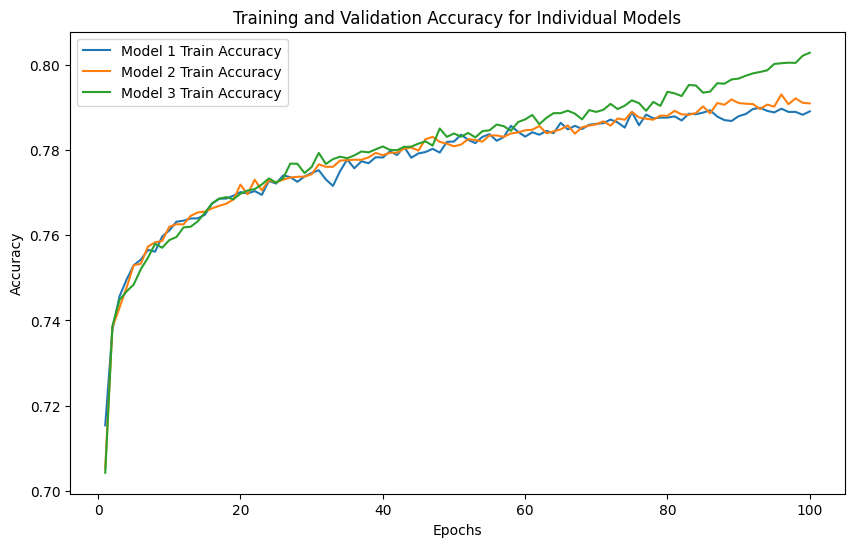

In [ ]:
# Plot the accuracy during training for each individual model
plt.figure(figsize=(10, 6))
epochs = np.arange(1, 101)
for i in range(num_models):
    plt.plot(epochs, train_acc_history[i], label=f'Model {i+1} Train Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for Individual Models')
plt.show()

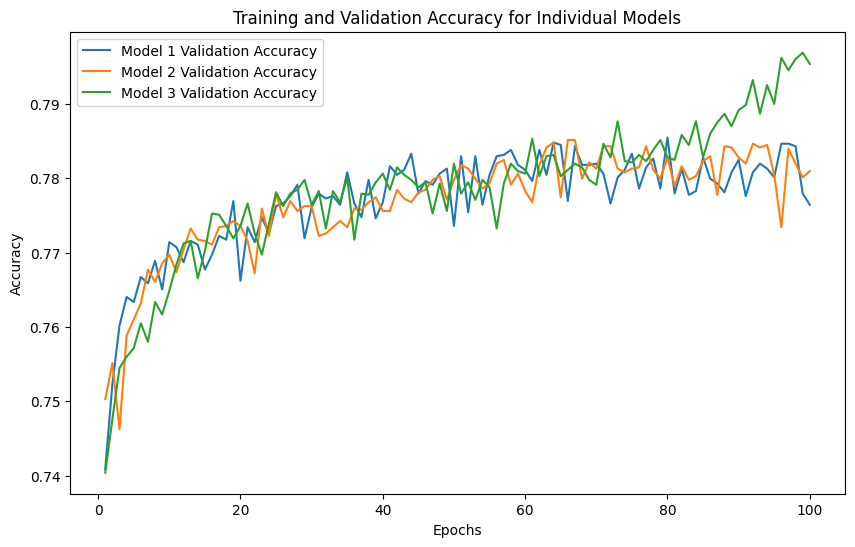

In [ ]:
# Plot the accuracy during training for each individual model
plt.figure(figsize=(10, 6))
epochs = np.arange(1, 101)
for i in range(num_models):
    plt.plot(epochs, val_acc_history[i], label=f'Model {i+1} Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for Individual Models')
plt.show()